**Name: Ayush Shashikant Bulbule**<br>
**Roll No: 31410**<br>
**Assignment no : 01**<br>
Perform the following operations using Python on any open-source dataset (e.g., data.csv)
1. Import all the required Python Libraries.
2. Locate an open-source data from the web (e.g. https://www.kaggle.com). Provide a clear description of the data and its source (i.e., URL of the web site).
3. Load the Dataset into pandas' data frame.
4. Data Preprocessing: check for missing values in the data using pandas isnull (), describe function to get some initial statistics. Provide variable descriptions. Types of variables etc. Check the dimensions of the data frame.
5. Data Formatting and Data Normalization: Summarize the types of variables by checking the data types (i.e., character, numeric, integer, factor, and logical) of the variables in the data set. If variables are not in the correct data type, apply proper type conversions.
6. Turn categorical variables into quantitative variables in
Python.
In addition to the codes and outputs, explain every operation that you do in the above steps and explain everything that you do to import/read/scrape the data set.


In [47]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn



## Part 1
**Data Wrangling** Data wrangling, also known as data munging, is the process of cleaning, transforming, and organizing raw data into a structured format suitable for analysis.

1. import the required libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset using pandas library

In [49]:
data = pd.read_csv('data_titanic.csv')

Check the contents of dataset using df.head() and df.tail() functions

In [50]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Print the name of all columns of the data

In [52]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count the values

In [55]:
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [56]:
data[['Survived','Pclass']].value_counts()

Survived  Pclass
0         3         372
1         1         136
          3         119
0         2          97
1         2          87
0         1          80
Name: count, dtype: int64

<br/>

**Evaluating for NULL Data**
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
- isnull()
- .notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data. "True" stands for missing value, while "False" stands for not missing value.

**Deal with missing data**

**1. Drop data**
- Drop the whole row
- Drop the whole column

**2.Replace data**
- Replace it by mean
- Replace it by frequency / mode
- Replace it based on other functions

In [57]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
data_missing = data.isna().sum()

The `figsize` parameter sets the size of the figure, and `rot` controls the rotation of x-axis labels (0 means horizontal). 

<Axes: >

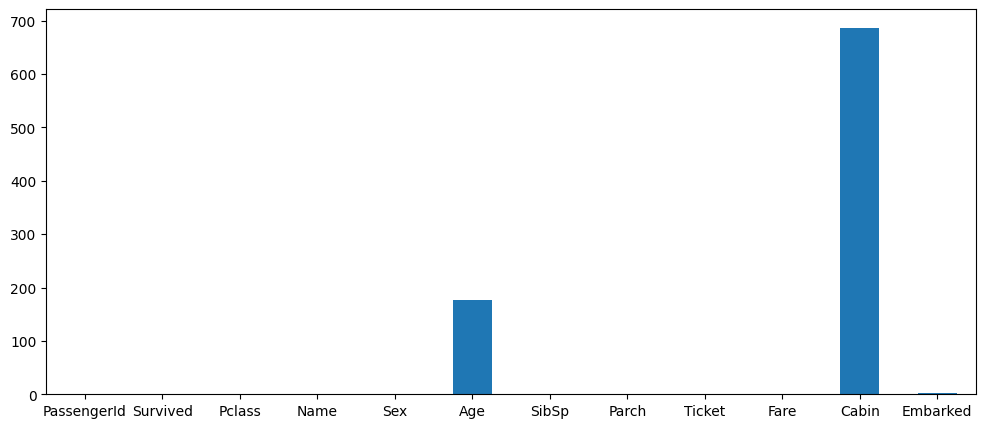

In [60]:
data_missing.plot.bar(figsize=(12,5),rot=0)

In [61]:
data.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Dimension of DataFrame

In [62]:
data.shape

(891, 12)

Fill the null values 

In [63]:
mean_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(value = mean_age)
print(data['Age'].isnull().sum())

0


In [64]:
variable_descriptions = data.info()
variable_types = data.dtypes
print("Variable descriptions:\n", variable_descriptions)
print("\nVariable types:\n", variable_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Variable descriptions:
 None

Variable types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket       

<br/>


**5. Data Normalization**


In [65]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Assigning Data Tyes

In [66]:
data['PassengerId'] = data['PassengerId'].astype(int)
data['Survived'] = data['Survived'].astype(int)
data['Pclass'] = data['Pclass'].astype(int)
data['SibSp'] = data['SibSp'].astype(int)
data['Parch'] = data['Parch'].astype(int)
# nvert Sex and Embarked to category
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

# After making the necessary changes, check the structure of the data again
print("\nDataset after Data Type Conversion:")
print(data.dtypes)


Dataset after Data Type Conversion:
PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


In [67]:

!pip3 install scikit-learn


In [68]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Standardization

In [69]:
import numpy as np

def standard_scaler(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    scaled_data = [(x-mean) / std_dev for x in data]
    return scaled_data

from sklearn.preprocessing import StandardScaler
standardized_data = scaler.fit_transform(data['Fare'].values.reshape(-1,1))

print(standardized_data.mean())

0.06285842768394742


Normalization

In [70]:
from sklearn.preprocessing import MinMaxScaler

def minMaxScaler(data):
    min_val = min(data)
    max_val = max(data)
    scaled_data = [(x-min_val)/(max_val-min_val) for x in data]
    return scaled_data
    

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data['Fare'].values.reshape(-1, 1))
print(normalized_data)



[[0.01415106]
 [0.13913574]
 [0.01546857]
 [0.1036443 ]
 [0.01571255]
 [0.0165095 ]
 [0.10122886]
 [0.04113566]
 [0.02173075]
 [0.05869429]
 [0.03259623]
 [0.05182215]
 [0.01571255]
 [0.06104473]
 [0.01533038]
 [0.03122992]
 [0.05684821]
 [0.02537431]
 [0.03513366]
 [0.01410226]
 [0.05074862]
 [0.02537431]
 [0.01567195]
 [0.06929139]
 [0.04113566]
 [0.06126432]
 [0.01410226]
 [0.51334181]
 [0.01537917]
 [0.01541158]
 [0.0541074 ]
 [0.28598956]
 [0.01512699]
 [0.02049464]
 [0.16038672]
 [0.10149724]
 [0.01411046]
 [0.01571255]
 [0.03513366]
 [0.02194234]
 [0.01849397]
 [0.04098927]
 [0.01541158]
 [0.08115719]
 [0.01537917]
 [0.01571255]
 [0.03025399]
 [0.01512699]
 [0.04231498]
 [0.03474329]
 [0.07746484]
 [0.01522459]
 [0.14976542]
 [0.05074862]
 [0.12097534]
 [0.06929139]
 [0.02049464]
 [0.01411046]
 [0.05416439]
 [0.0915427 ]
 [0.01411046]
 [0.1561496 ]
 [0.16293235]
 [0.05445717]
 [0.0541074 ]
 [0.02975782]
 [0.02049464]
 [0.01592394]
 [0.01546857]
 [0.01690807]
 [0.02049464]
 [0.09